## Import das bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
import sklearn.metrics as metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

## Carregamento da base de dados

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
genero = pd.read_csv('/content/drive/My Drive/Transformed Data Set - Sheet1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pré-processamento da base de dados

In [ ]:
genero.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [ ]:
genero.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [ ]:
genero['Gender'] = genero['Gender'].replace(['F'], 0)

In [ ]:
genero['Gender'] = genero['Gender'].replace(['M'], 1)

In [ ]:
genero.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0


In [ ]:
X = genero.iloc[:, 0:4].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X)

In [ ]:
y = genero.iloc[:, 4]

## Naive Bayes

In [ ]:
clf = Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore', sparse=False)), ('scaler', StandardScaler()), ('model', GaussianNB())])

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        33
           1       0.73      0.67      0.70        33

    accuracy                           0.71        66
   macro avg       0.71      0.71      0.71        66
weighted avg       0.71      0.71      0.71        66



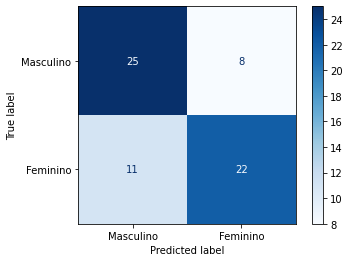

In [ ]:
clf.fit(X, y)
print(classification_report(y, clf.predict(X)))
print(plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues, display_labels=['Masculino', 'Feminino']))

## Decision tree

In [ ]:
target_names = ['Masculino', 'Feminino']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy',
                                            max_depth=None,
                                            random_state=0)
decision_tree = decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print('Classificador árvore de decisão:\n')
print('Acurácia da base de treinamento: {:.2f}'.format(decision_tree.score(X_train, y_train)))
print(classification_report(y_test, y_pred, target_names=target_names))

Classificador árvore de decisão:

Acurácia da base de treinamento: 0.98
              precision    recall  f1-score   support

   Masculino       1.00      0.50      0.67         4
    Feminino       0.75      1.00      0.86         6

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_table = pd.DataFrame(data=conf_matrix, index=target_names, columns=[x + " prev" for x in target_names])
print(conf_table)

           Masculino prev  Feminino prev
Masculino               2              2
Feminino                0              6


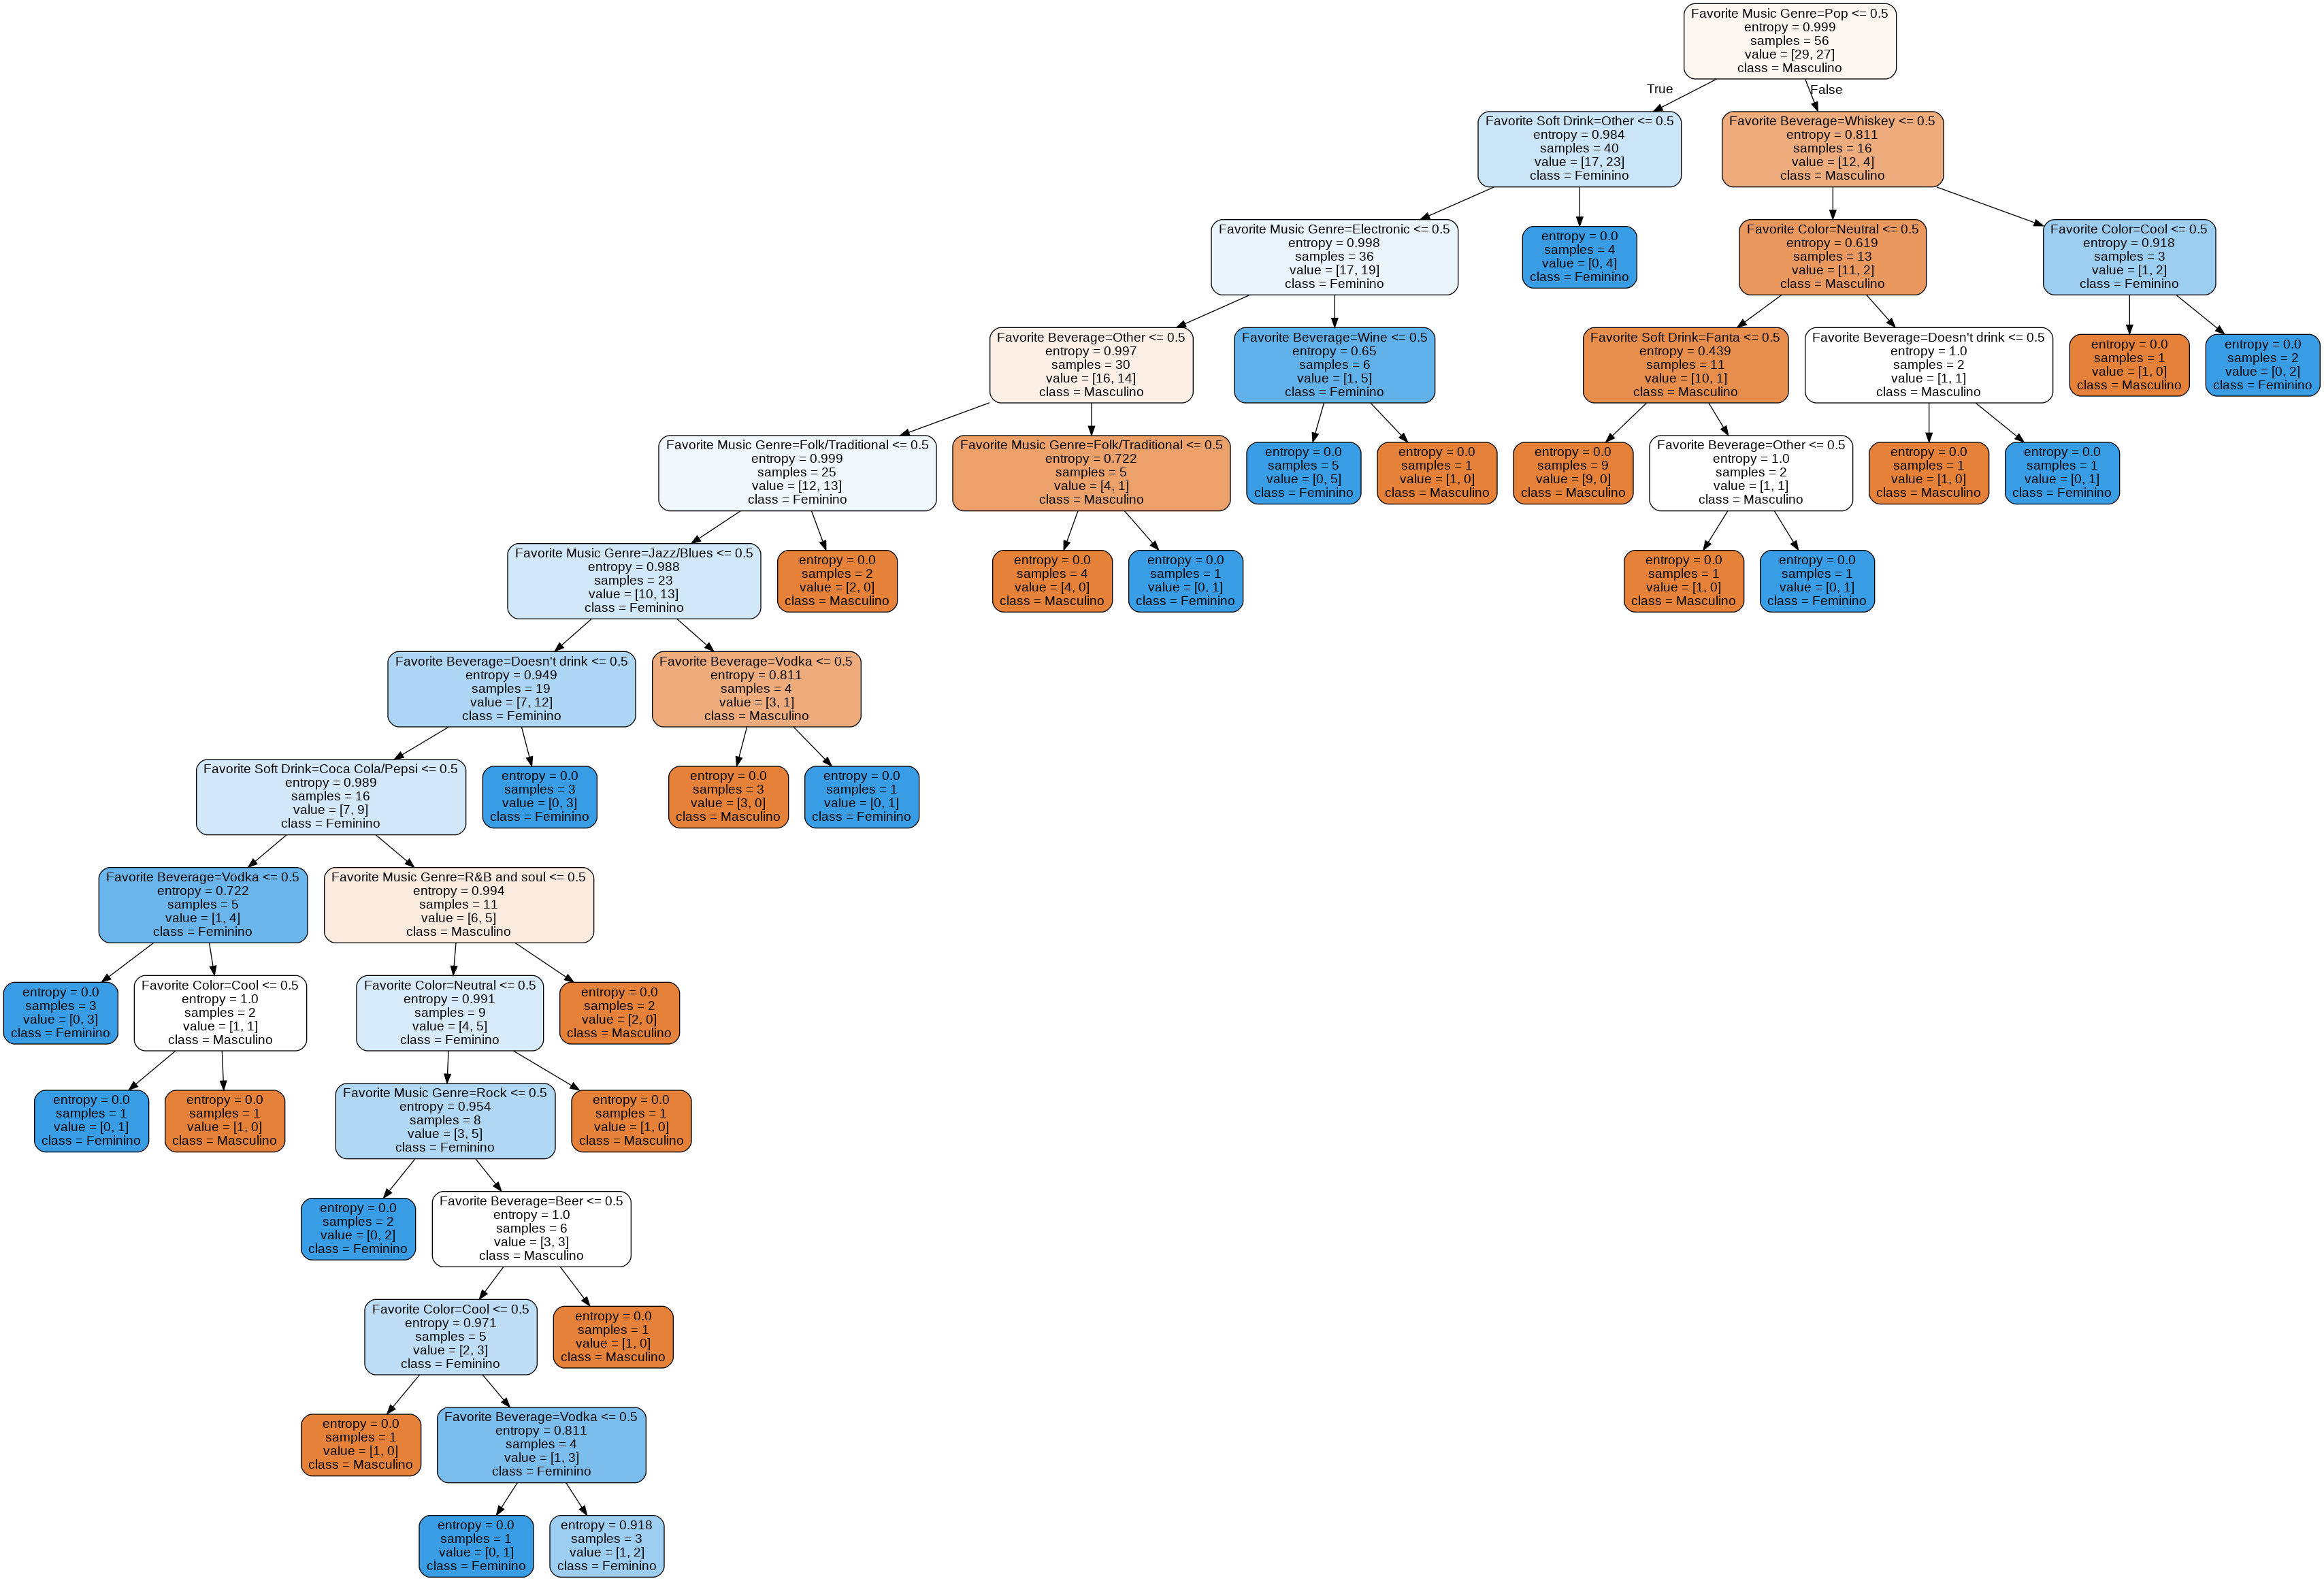

In [ ]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=vect.feature_names_,
                                rounded=True,
                                filled=True,
                                class_names=target_names)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

## Aplicando Grid Search e Cross Validation

In [ ]:
tree_selection = DecisionTreeClassifier()
params = {'criterion': ('gini', 'entropy'),
          'max_features': (None, 'auto', 'log2'),
          'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

classif_grid = GridSearchCV(tree_selection, param_grid=params)
y_pred = classif_grid.fit(X, y).predict(X_test)

print('Melhores parâmetros para o modelo:')
print(classif_grid.best_params_, '\n')

print('Acurácia da previsão:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names= target_names))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_table = pd.DataFrame(data=conf_matrix, index=target_names, columns=[x + " prev" for x in target_names])
print(conf_table)

Melhores parâmetros para o modelo:
{'criterion': 'gini', 'max_features': 'auto', 'random_state': 3} 

Acurácia da previsão: 1.0
              precision    recall  f1-score   support

   Masculino       1.00      1.00      1.00         4
    Feminino       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

           Masculino prev  Feminino prev
Masculino               4              0
Feminino                0              6


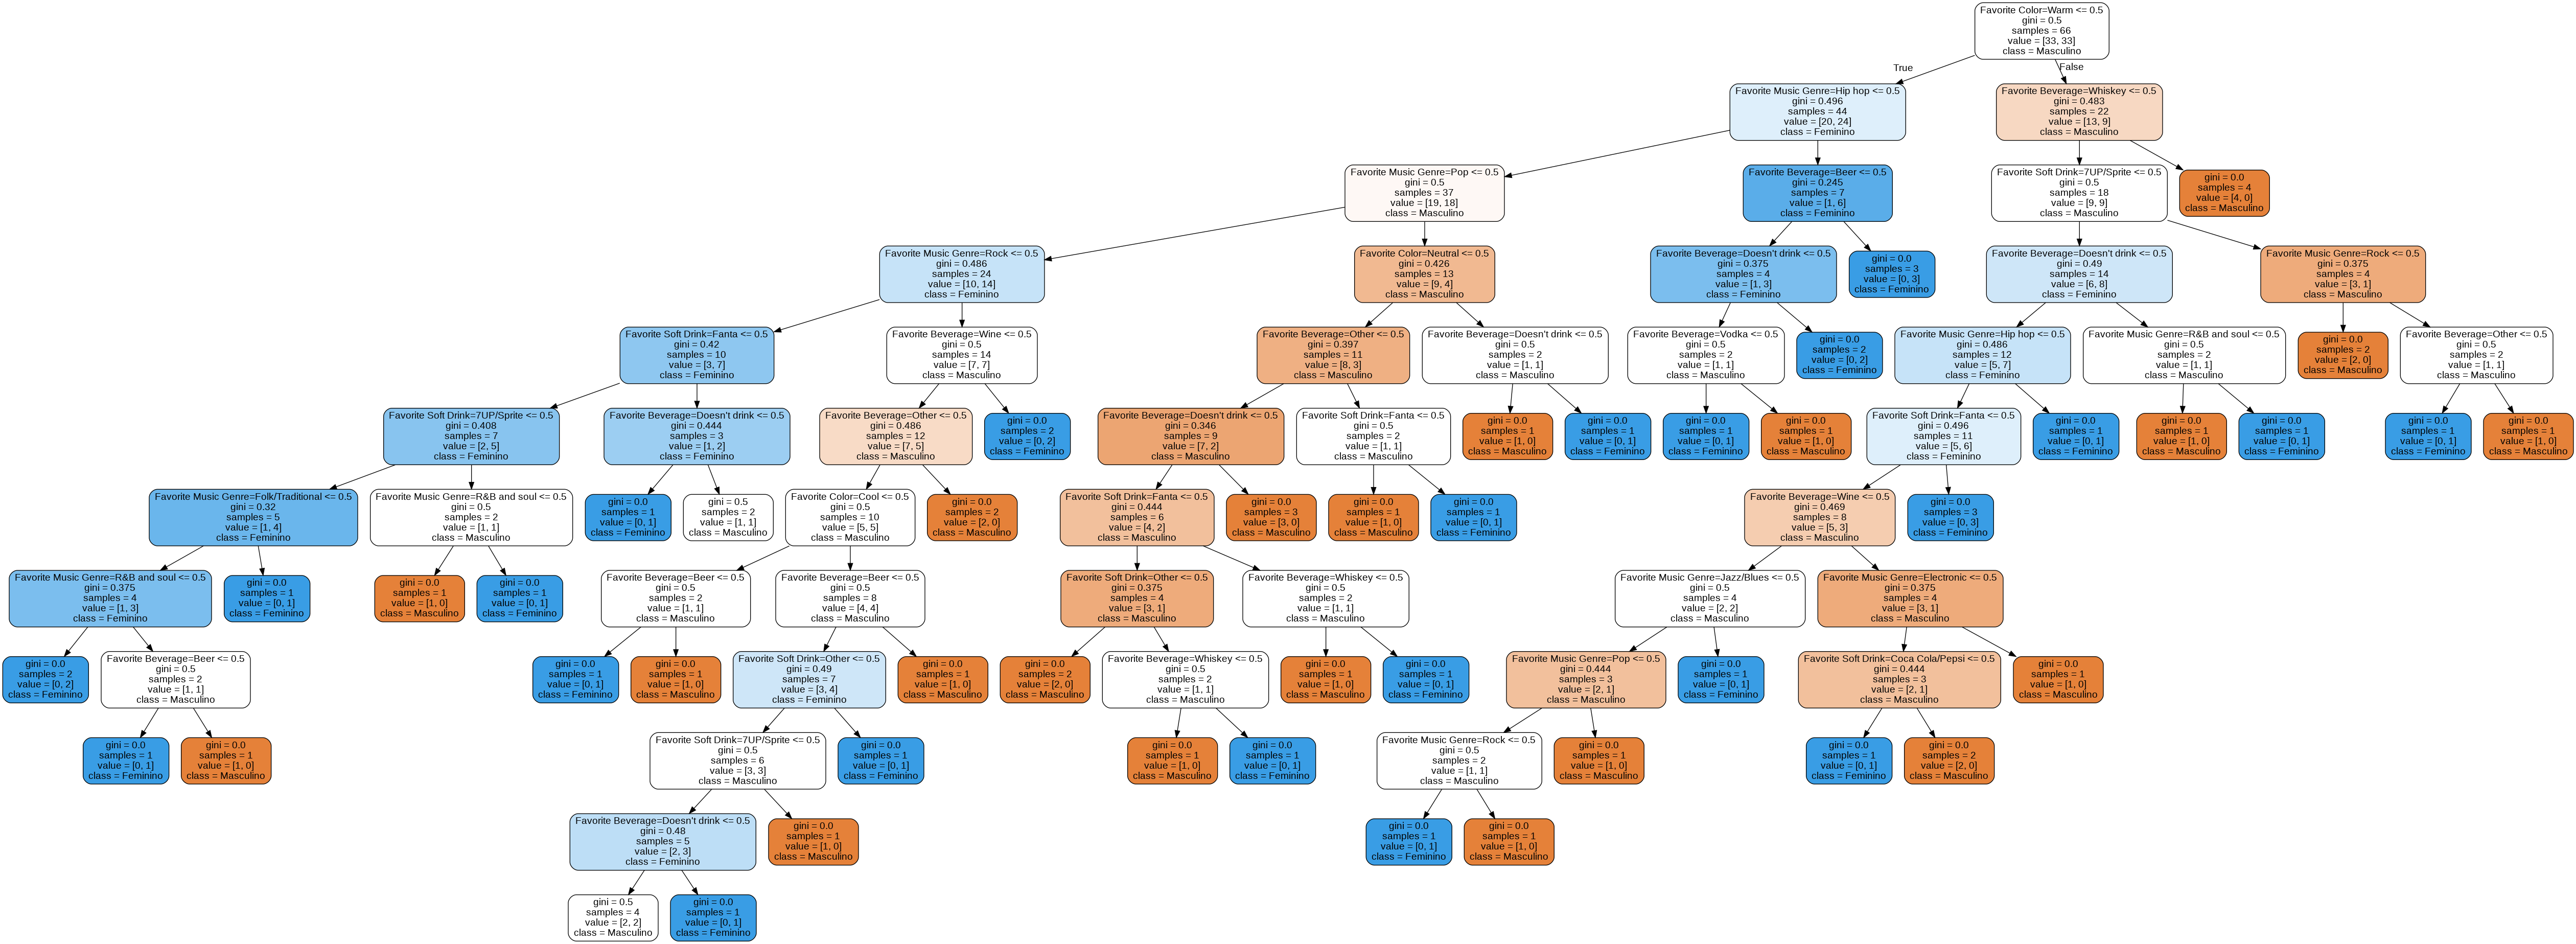

In [ ]:
dot_data = tree.export_graphviz(classif_grid.best_estimator_, out_file=None,
                                proportion=False,
                                rounded=True,
                                filled=True,
                                feature_names=vect.feature_names_,
                                class_names=target_names)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

## Redes neurais

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100], learning_rate_init=0.01, max_iter=200000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print('Camadas da rede: {}'.format(mlp.n_layers_))
print('Neurônios na camada oculta: {}'.format(mlp.hidden_layer_sizes))
print('Neurônios na camada de saída: {}'.format(mlp.n_outputs_))
print('Pesos na camada de entrada: {}'.format(mlp.coefs_[0].shape))
print('Pesos na camada oculta: {}'.format(mlp.coefs_[1].shape))

print('Acurácia da base de treinamento: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Acurácia da base de teste: {:.2f}'.format(mlp.score(X_test, y_test)))

print(classification_report(y_test, y_pred, target_names=target_names))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Camadas da rede: 3
Neurônios na camada oculta: [100]
Neurônios na camada de saída: 1
Pesos na camada de entrada: (20, 100)
Pesos na camada oculta: (100, 1)
Acurácia da base de treinamento: 0.98
Acurácia da base de teste: 0.80
              precision    recall  f1-score   support

   Masculino       1.00      0.50      0.67         4
    Feminino       0.75      1.00      0.86         6

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10

[[2 2]
 [0 6]]


## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest = random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print('Classificador Random Forest:\n Número de estimadores = 10\n')
print('Acurácia da base de treinamento {:.2f}'.format(random_forest.score(X_train, y_train)))
print(classification_report(y_test, y_pred, target_names=target_names))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_table = pd.DataFrame(data=conf_matrix, index=target_names, columns=[x + ' prev' for x in target_names])
print(conf_table)

Classificador Random Forest:
 Número de estimadores = 10

Acurácia da base de treinamento 0.96
              precision    recall  f1-score   support

   Masculino       0.67      0.50      0.57         4
    Feminino       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

           Masculino prev  Feminino prev
Masculino               2              2
Feminino                1              5
